# Google play store data
## Complete EDA analysis beginner to advance Level
- About Dataset
- Description\
The Data Set was downloaded from Kaggle, from the following link

- Context
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

- Content
Each app (row) has values for catergory, rating, size, and more.

- Acknowledgements
This information is scraped from the Google Play Store. This app information would not be available without it.

- Inspiration
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data loading, Exploration and cleaning

In [2]:
df = pd.read_csv('./archive/googleplaystore.csv')

- looking the data 

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# Setting of all maximum columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# hide warning
import warnings
warnings.filterwarnings('ignore')

In [5]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
df.shape

(10841, 13)

In [7]:
print(f"The numbers of Rows are {df.shape[0]}, and columns are {df.shape[1]}")

The numbers of Rows are 10841, and columns are 13


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [9]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


# How to convert column to numeric

In [10]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [11]:
df['Size'].isnull().sum()

0

- So we are good to go because there is no missing value in it

In [12]:
# find M values
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8830

In [13]:
# find k values
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

In [14]:

df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [15]:
8830+316+1695

10841

# covert the whole size column yo bytes

In [16]:
# define a function
def convert_size(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', '')) * 1024
        elif 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
        return size
        

In [17]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
5                      5.6M
6                       19M
7                       29M
8                       33M
9                      3.1M
10                      28M
11                      12M
12                      20M
13                      21M
14                      37M
15                     2.7M
16                     5.5M
17                      17M
18                      39M
19                      31M
20                      14M
21                      12M
22                     4.2M
23                     7.0M
24                      23M
25                     6.0M
26                      25M
27                     6.1M
28                     4.6M
29                     4.2M
30                     9.2M
31                     5.2M
32                      11M
33                      11M
34                     4.2M
35                  

In [18]:
# Now Apply the function

df['Size'] = df['Size'].apply(convert_size)



In [19]:
df['Size'].head()

0    19922944.0
1    14680064.0
2     9122611.2
3    26214400.0
4     2936012.8
Name: Size, dtype: float64

In [20]:
# renaming the column
df.rename(columns={'Size':'Size_in_bytes'}, inplace=True)

In [21]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [22]:
df['Size_in_Mb'] = df['Size_in_bytes'].apply(lambda x: x/(1024*1024))

In [23]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


# let's Look at Install Column

In [24]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [25]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [26]:
df['Installs'].isnull().sum()

0

# so here we have no missing values we are good to go with it
- we just need to remove the plus sign and
- Comma sign ","
- in order to convert it to integer

In [27]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)

In [28]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '')if ',' in str(x) else x)

In [29]:
df['Installs'] = df['Installs'].apply(lambda x: int(x))

In [30]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [31]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,100.000000


In [32]:
# making a new column called 'Installs_category' which will have the category of the installs
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels=['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
df['Installs_category'] = pd.cut(df['Installs'], bins=bins, labels=labels)

In [33]:
df['Installs_category'].value_counts() # check the value counts of the new column


Installs_category
Low                   2162
High                  2118
Very High             2004
More than moderate    1648
Moderate              1531
Top Notch              828
Very low               535
no                      15
Name: count, dtype: int64

# Price Column Handling and converting from object to numeric

In [34]:
df['Price'].value_counts()

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$24.99         7
$3.49          7
$7.99          7
$5.49          6
$19.99         6
$11.99         5
$6.49          5
$12.99         5
$8.99          5
$10.00         3
$16.99         3
$1.00          3
$2.00          3
$13.99         2
$8.49          2
$17.99         2
$1.70          2
$3.95          2
$79.99         2
$7.49          2
$9.00          2
$10.99         2
$39.99         2
$33.99         2
$1.96          1
$19.40         1
$4.80          1
$3.28          1
$4.59          1
$15.46         1
$3.04          1
$4.29          1
$2.60          1
$2.59          1
$3.90          1
$154.99        1
$4.60          1
$28.99         1
$2.95          1
$2.90          1
$1.97          1
$200.00        1
$89.99         1
$2.56   

In [35]:
# lets see how many values $ sign has

df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

800

In [36]:
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '') if "$" in str(x) else x)

In [37]:
df['Price'].value_counts()

Price
0         10041
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
29.99         7
24.99         7
3.49          7
7.99          7
5.49          6
19.99         6
11.99         5
6.49          5
12.99         5
8.99          5
10.00         3
16.99         3
1.00          3
2.00          3
13.99         2
8.49          2
17.99         2
1.70          2
3.95          2
79.99         2
7.49          2
9.00          2
10.99         2
39.99         2
33.99         2
1.96          1
19.40         1
4.80          1
3.28          1
4.59          1
15.46         1
3.04          1
4.29          1
2.60          1
2.59          1
3.90          1
154.99        1
4.60          1
28.99         1
2.95          1
2.90          1
1.97          1
200.00        1
89.99         1
2.56          1
1.20          1
1.26          1
30.99         1
3.

In [38]:
# Now converting it in a numeric value

df['Price'] = df['Price'].apply(lambda x: float(x))

In [39]:
df['Price'].dtypes

dtype('float64')

In [40]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


In [41]:
# Using f string for print max,min,average price of app

print(f"Maximum price of app is {df['Price'].max()}")
print(f"Minimum price of app is {df['Price'].min()}")
print(f"Average price of app is {df['Price'].mean()}")

Maximum price of app is 400.0
Minimum price of app is 0.0
Average price of app is 1.0272733142699015


- Finding Missing Values

In [42]:
df.isnull().sum()

App                     0
Category                1
Rating               1474
Reviews                 0
Size_in_bytes        1695
Installs                0
Type                    1
Price                   0
Content Rating          0
Genres                  1
Last Updated            0
Current Ver             8
Android Ver             2
Size_in_Mb           1695
Installs_category       0
dtype: int64

In [43]:
df.isnull().sum().sort_index(ascending=False)

Type                    1
Size_in_bytes        1695
Size_in_Mb           1695
Reviews                 0
Rating               1474
Price                   0
Last Updated            0
Installs_category       0
Installs                0
Genres                  1
Current Ver             8
Content Rating          0
Category                1
App                     0
Android Ver             2
dtype: int64

In [44]:
# Average of missing values
df.isnull().sum()/len(df)*100

App                   0.000000
Category              0.009224
Rating               13.596532
Reviews               0.000000
Size_in_bytes        15.635089
Installs              0.000000
Type                  0.009224
Price                 0.000000
Content Rating        0.000000
Genres                0.009224
Last Updated          0.000000
Current Ver           0.073794
Android Ver           0.018448
Size_in_Mb           15.635089
Installs_category     0.000000
dtype: float64

In [45]:
# Toatal missing values

df.isnull().sum().sum()

4877

<Axes: >

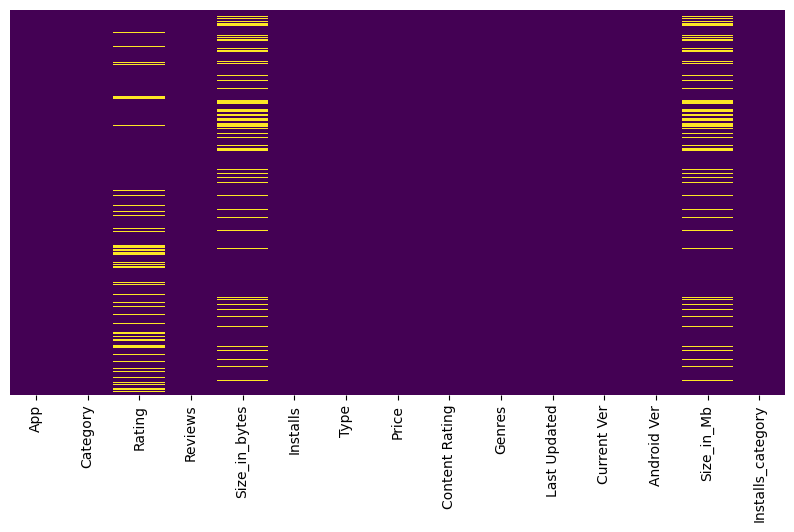

In [46]:
# plot missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Text(0.5, 1.0, 'Percentage of Missing Values in Each Columns')

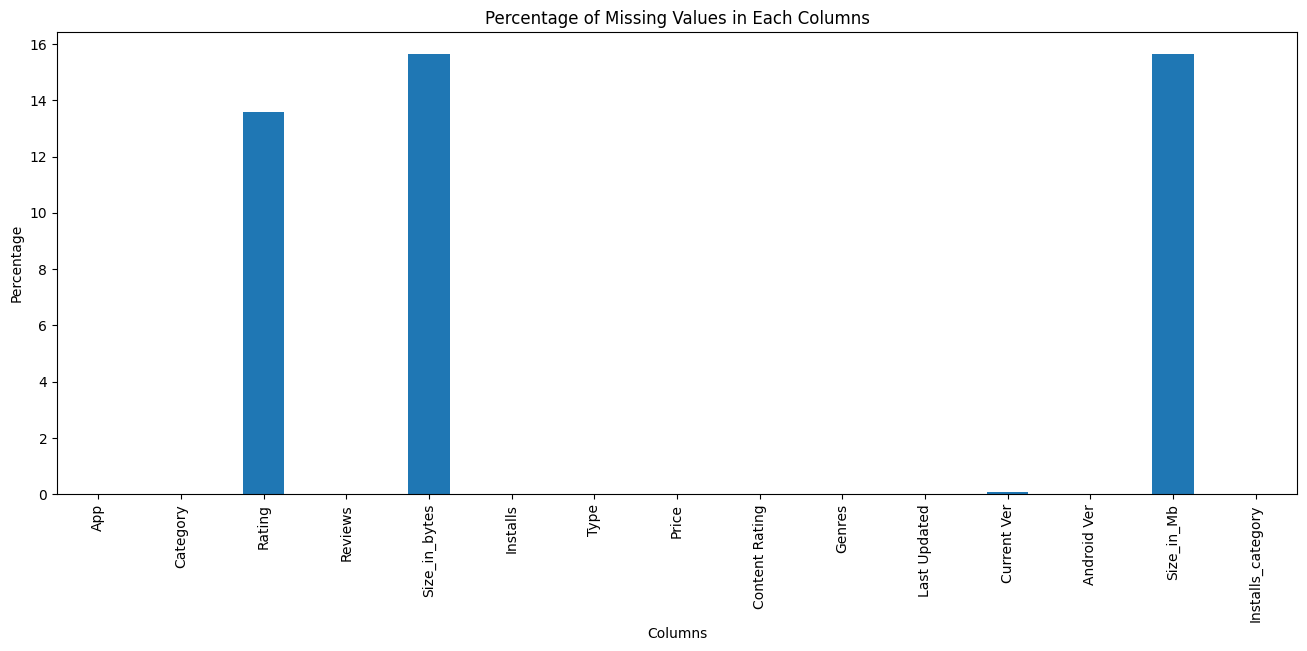

In [47]:
# ploting Missing values Percentage
plt.figure(figsize=(16,6))
# percentage missing values
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')

# adding labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in Each Columns')

Text(0.5, 1.0, 'Percentage of all Missing values in each column without Rating columns')

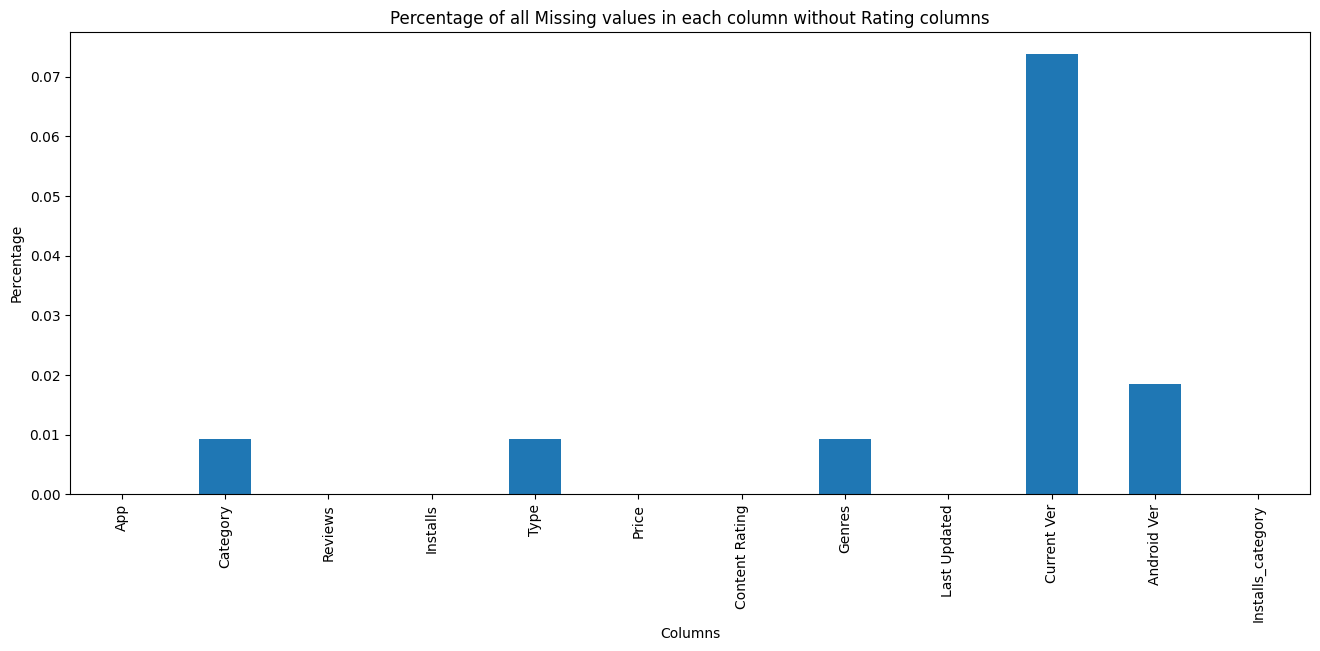

In [48]:
plt.figure(figsize=(16,6))
missing_percentage[missing_percentage < 1].plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of all Missing values in each column without Rating columns')

In [49]:
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes        1695
Size_in_Mb           1695
Rating               1474
Current Ver             8
Android Ver             2
Category                1
Type                    1
Genres                  1
App                     0
Reviews                 0
Installs                0
Price                   0
Content Rating          0
Last Updated            0
Installs_category       0
dtype: int64

In [50]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

Size_in_bytes        15.635089
Size_in_Mb           15.635089
Rating               13.596532
Current Ver           0.073794
Android Ver           0.018448
Category              0.009224
Type                  0.009224
Genres                0.009224
App                   0.000000
Reviews               0.000000
Installs              0.000000
Price                 0.000000
Content Rating        0.000000
Last Updated          0.000000
Installs_category     0.000000
dtype: float64

# Observations
- so here we have 1695 missing values in **Size in bytes & Size in Mb** which is 15.63 percent from all the column, Missing values of both of them are same because we cut out both of them from the same column Size(original data set column) and we used bytes and Mb formula on it.
- Then we have 1474 Missing values in **Rating** column which is again 13.5 percent of all the column but on the other we cannot impute the mean over there because there are the apps that has only 2 installation so then there is no rating so how we can impute the average in that situation so sometimes you will get encounter with this type situation, be present deeply look at the data what is all about then take/make a decision.
- we have 8 Missing values in **Current Ver**, 2 in **Android Ver**, 1 in **Category**, 1 in **Type** and 1 in **Genres**  


- lets run the correlation matrix now! so that we can have a better understanding of numeric data

In [51]:
df.describe() # numeric columns

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


<Axes: >

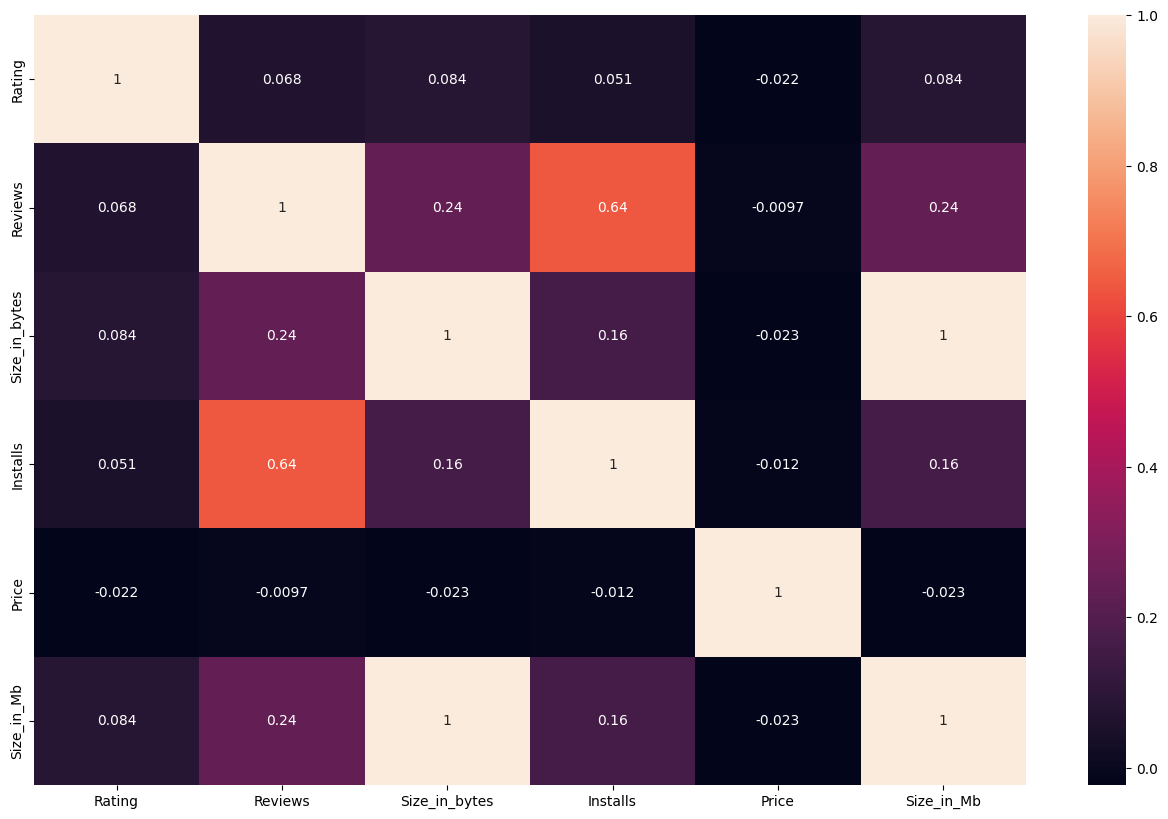

In [52]:
# Make a correlation Matrix of Numeric Columns
plt.figure(figsize=(16,10)) # define a plot size
numeric_col= ["Rating", "Reviews",	"Size_in_bytes", "Installs", "Price", "Size_in_Mb"] # Make a list of numeric column
sns.heatmap(df[numeric_col].corr(), annot=True) # draw a plot to check the corr matrix 

In [53]:
# we can also calculate the correlation matrix using pandas
df[numeric_col].corr()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
Rating,1.000000,0.068147,0.084098,0.051393,-0.021851,0.084098
Reviews,0.068147,1.000000,0.238218,0.643123,-0.009666,0.238218
Size_in_bytes,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000
Installs,0.051393,0.643123,0.164794,1.000000,-0.011688,0.164794
Price,-0.021851,-0.009666,-0.023000,-0.011688,1.000000,-0.023000
Size_in_Mb,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000


In [54]:
# we can also calculate the correaltion matrix by using pearson r method
# for that we have install scipy library and then import stats from it
# let's Start

from scipy import stats # from scipy import stats

# remove nan or infinite values ( important for caculation pearson r)
df_clean = df.dropna()

pearson_r,_ = stats.pearsonr(df_clean['Reviews'], df_clean['Installs'])
print(f"Pearson's R Between Reviews and Installs: {pearson_r:.4f}")



Pearson's R Between Reviews and Installs: 0.6262


## Observations
- Here we see that the **Reviews** Column has highest correlation with **Installs** Column which 0.64 as shown in corr() in the heatmap.
- and the Pearson model also showing us 0.6262
- **So**
- The lighter colour will show us that they both have great bonding/they are quite correlated with each other.
- its very obvious that the more **Reviews** the app will get, the more it can be  **Downloaded or Installs**.
- then we are seeing that **Installs** is slightly correlated with Size but it is not much enough to analyse.

- Now we going to remove all categorical or objects Columns rows so that we will go towards our goal Smoothly. **Current Ver, Android Ver, Category, Type and Genres columns, as they are very less in number and will not affect our analysis.**

In [55]:
# Length before removing the null values from our data sets
print(f"The lenght before removing null values from our Data Frame: {len(df)}")

The lenght before removing null values from our Data Frame: 10841


In [56]:
# Removing the null values from these columns of our Data Set Current Ver, Android Ver, Category, Type and Genres

df.dropna(subset=["Current Ver", "Android Ver", "Category", "Type", "Genres"], inplace=True)

In [57]:
# Length after Removing Null Values from the Data Frame
print(f"The length of our Data Frame after Removing null Values: {len(df)}")

The length of our Data Frame after Removing null Values: 10829


- So we removed 12 rows from the above mentioned Columns

In [58]:
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes        1694
Size_in_Mb           1694
Rating               1469
App                     0
Category                0
Reviews                 0
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category       0
dtype: int64

- Now we don't have any null values except these three columns 
- Size_in_bytes: 1694
- Size_in_Mb: 1694 
- Rating: 1469

- Here we know and checked it before that we've to deal with Rating missing values very carefully because it is directly associated with Installs

In [59]:
# Checking the trend of Rating in each Installs_category column by using group_by Function
df.groupby('Installs_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
Low,1278.0,4.170970,0.825605,1.0,3.8,4.4,4.8,5.0
Moderate,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
More than moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
High,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
Very High,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Top Notch,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


# Assignment-1: Please replace the respective missing values of Rating, with respect to the average give in each 'Installs Category'!

In [60]:
df['Rating'].value_counts().sum()

9360

In [61]:
df['Rating'].isnull().sum()

1469

In [62]:
# in which Install_category the Rating has NaN values
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

Installs_category
Low                   880
Very low              453
Moderate               88
More than moderate     31
no                     14
High                    3
Very High               0
Top Notch               0
Name: count, dtype: int64

Text(7, 3.5, 'Null values: 0')

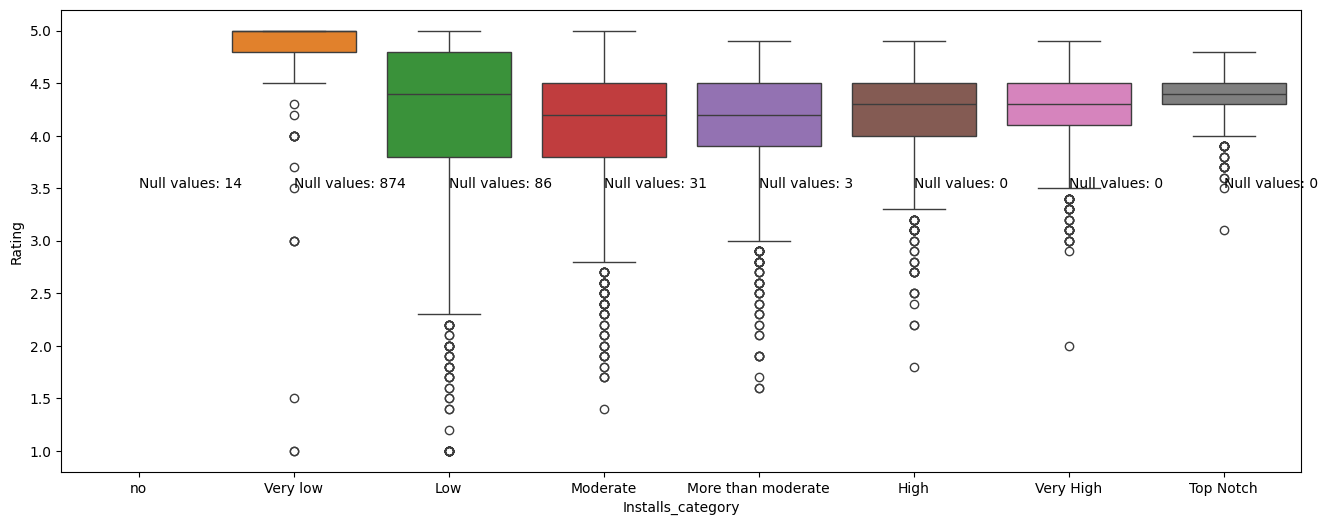

In [63]:
# plot the boxplot of Rating in each Installs_category
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y='Rating', hue='Installs_category', data=df) # plot the boxplot
# add the text of number of null values in each category
plt.text(0, 3.5, 'Null values: 14')
plt.text(1, 3.5, 'Null values: 874')
plt.text(2, 3.5, 'Null values: 86')
plt.text(3, 3.5, 'Null values: 31')
plt.text(4, 3.5, 'Null values: 3')
plt.text(5, 3.5, 'Null values: 0')
plt.text(6, 3.5, 'Null values: 0')
plt.text(7, 3.5, 'Null values: 0')

In [64]:
print(df['Rating'].isnull().sum())


1469


In [65]:
df['Rating'] = df.groupby('Installs_category')['Rating'].transform(lambda x: x.fillna(x.mean()))
mean_rating = df.groupby('Installs_category')['Rating'].mean()


In [66]:
df['Rating'].isnull().sum()

14

- lets check reviews column whether there are any NaN or Null Values available in Install_category


In [67]:
df['Installs_category'].loc[df['Reviews'].isnull()].value_counts()

Installs_category
no                    0
Very low              0
Low                   0
Moderate              0
More than moderate    0
High                  0
Very High             0
Top Notch             0
Name: count, dtype: int64

- So there is no null values available in Reviews

<Axes: xlabel='Installs_category', ylabel='Reviews'>

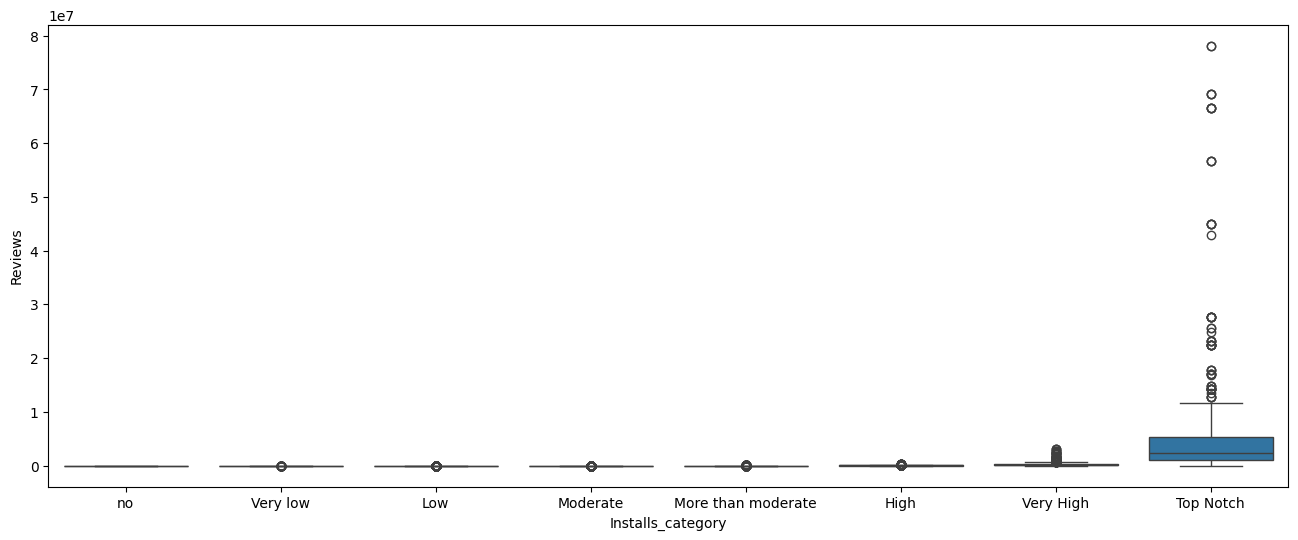

In [68]:
# Lets make a plot of Reviews column

plt.figure(figsize=(16,6))
sns.boxplot(x='Installs_category', y="Reviews", data=df)

- This plot is showing us that the data is so Imbalance so lets make it normalzie.
- By using log Transformation

<Axes: xlabel='Installs_category', ylabel='Reviews'>

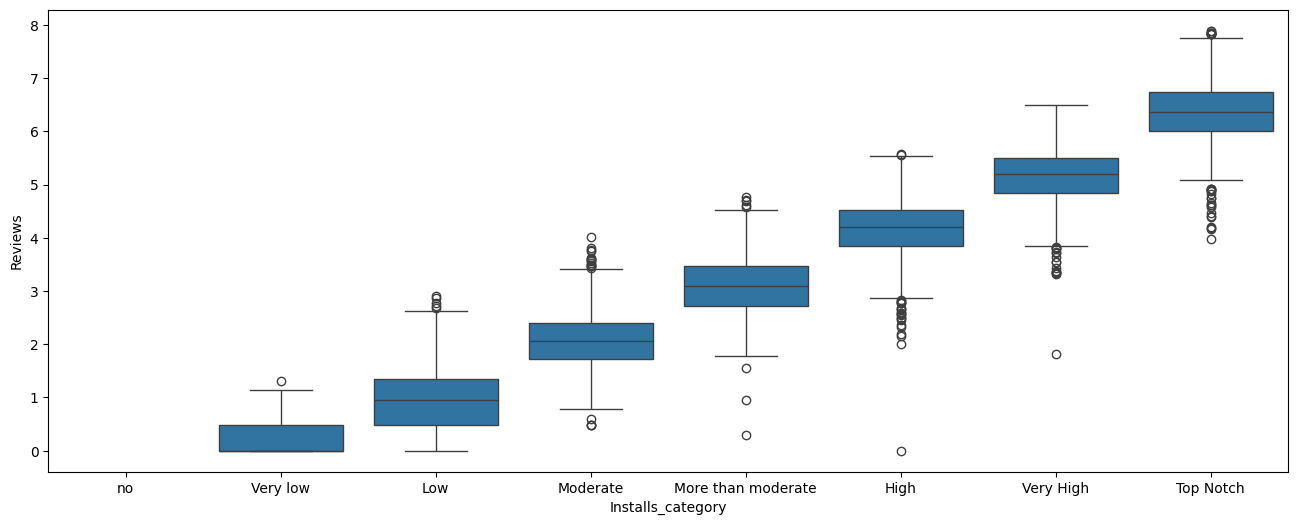

In [69]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Installs_category', y=np.log10(df['Reviews']), data=df)

- Now lets draw a scatter plot of Reviews, Rating and Installs_category
  

<Axes: xlabel='Rating', ylabel='Reviews'>

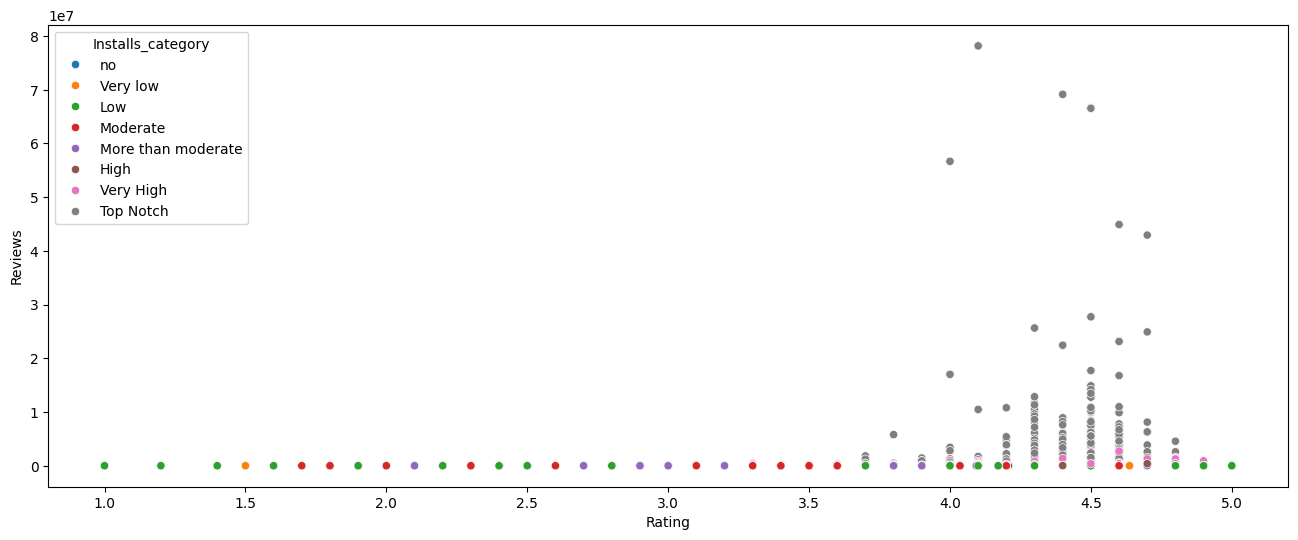

In [70]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='Rating', y="Reviews", hue='Installs_category', data=df)

<Axes: xlabel='Reviews', ylabel='Installs'>

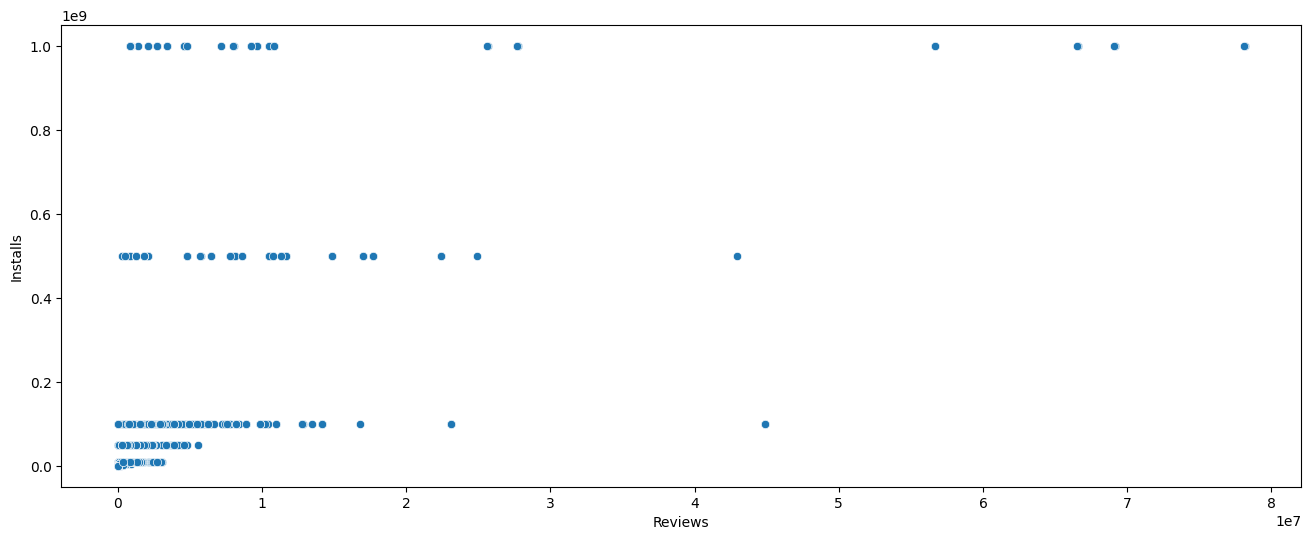

In [71]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Reviews', y='Installs', data=df) # plot the scatter plot

<Axes: xlabel='Reviews', ylabel='Installs'>

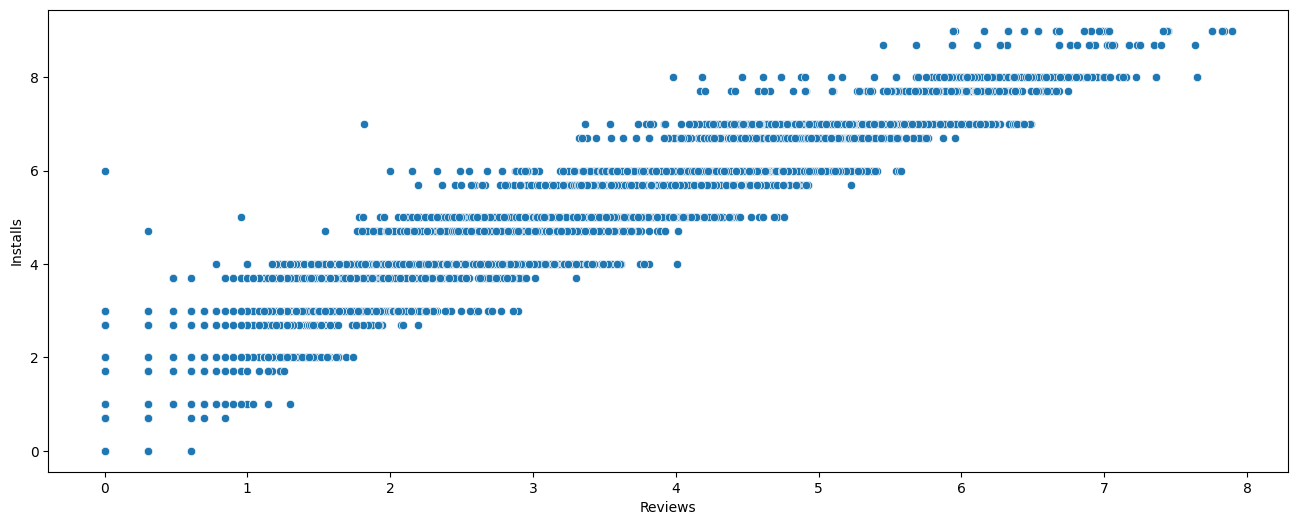

In [72]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x=np.log10(df['Reviews']), y=np.log10(df['Installs']), data=df) # plot the scatter plot

# Observation
- Here we are seeing that the installation got very high if the app has more reviews
- Now we see a slight trend but still the issue is installs were given in a factorial manner, as 10+, 20+, 1000+ etc, and these are not continuous number but Discreet one, therefore, we can only see a slight trends here. Let's plot a line plot to see the trend.


<Figure size 1600x600 with 0 Axes>

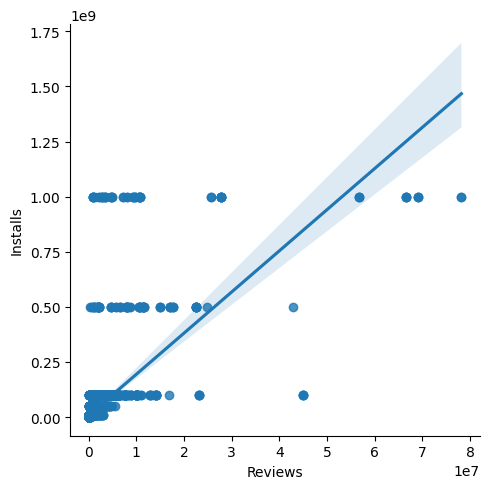

In [73]:
# plot reviews and installs in a scatter plot with trend line
plt.figure(figsize=(16, 6)) # make figure size
sns.lmplot(x='Reviews', y='Installs', data=df) # plot the scatter plot with trend line

- Here, we can see a nice trend, which shows that number of Reviews increases with the number of Installs, which is quite obvious

# Duplicates
- Removing duplicates is one of the most important part of the data wrangling process, we must remove the duplicates in order to get the correct insights from the data.
- If you do not remove duplicates from a dataset, it can lead to incorrect insights and analysis.
- Duplicates can skew statistical measures such as mean, median, and standard deviation, and can also lead to over-representation of certain data points.
- It is important to remove duplicates to ensure the accuracy and reliability of your data analysis.

In [74]:
# find duplicate if any
df.duplicated().sum()

483

This shows us total duplicates, but we can also check based on the app name, as we know that every app has a unique name.

In [75]:
# find duplicate if any in the 'App' column
df['App'].duplicated().sum()

1181

- Oops! we have 1181 dupicate app names
- Can we find a column which can help us to remove the duplicates?
- let's check for number of duplicates in each column using a for loop and printing the output

In [76]:
# let's check for number of duplicates
for col in df.columns:
    print(f"Number of duplicates in {col} column are: {df[col].duplicated().sum()}")

Number of duplicates in App column are: 1181
Number of duplicates in Category column are: 10796
Number of duplicates in Rating column are: 10784
Number of duplicates in Reviews column are: 4830
Number of duplicates in Size_in_bytes column are: 10373
Number of duplicates in Installs column are: 10809
Number of duplicates in Type column are: 10827
Number of duplicates in Price column are: 10737
Number of duplicates in Content Rating column are: 10823
Number of duplicates in Genres column are: 10710
Number of duplicates in Last Updated column are: 9453
Number of duplicates in Current Ver column are: 7998
Number of duplicates in Android Ver column are: 10796
Number of duplicates in Size_in_Mb column are: 10373
Number of duplicates in Installs_category column are: 10821


In [77]:
# print the number of duplicates in df
print(f"Number of duplicates in df are: {df.duplicated().sum()}")

Number of duplicates in df are: 483


- Find and watch all duplicates if they are real!

In [78]:
# find exact duplicates and print them
df[df['App'].duplicated(keep=False)].sort_values(by='App')

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.000000,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.800000,High
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.000000,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.800000,High
2543,1800 Contacts - Lens Store,MEDICAL,4.700000,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.000000,High
2322,1800 Contacts - Lens Store,MEDICAL,4.700000,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.000000,High
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.400000,12,3984588.8,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,3.800000,Low
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.400000,12,3984588.8,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,3.800000,Low
1337,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.400000,11506,15728640.0,100000,Free,0.00,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,15.000000,More than moderate
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.400000,11506,15728640.0,100000,Free,0.00,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,15.000000,More than moderate
3083,365Scores - Live Scores,SPORTS,4.600000,666521,26214400.0,10000000,Free,0.00,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,25.000000,Very High
5415,365Scores - Live Scores,SPORTS,4.600000,666246,26214400.0,10000000,Free,0.00,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,25.000000,Very High


- Remove Duplicates


In [79]:
# remove the duplicates
df.drop_duplicates(inplace=True)

In [80]:
# print the number of rows and columns after removing duplicates
print(f"Number of rows after removing duplicates: {df.shape[0]}")

Number of rows after removing duplicates: 10346


- Now we have removed 483 duplicates from the dataset. and have 10346 rows left.


# Insights from Data
3.1. Which category has the highest number of apps?

In [81]:
# which category has highest number of apps
df['Category'].value_counts().head(10) # this will show the top 10 categories with highest number of apps

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

- 3.2. Which category has the highest number of installs?


In [82]:
# category with highest number of Installs
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

- 3.3. Which category has the highest number of reviews?

In [84]:
# Category with highest number of Reviews
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)


Category
GAME               1415536650
COMMUNICATION       601273552
SOCIAL              533576829
FAMILY              396771746
TOOLS               273181033
PHOTOGRAPHY         204297410
VIDEO_PLAYERS       110380188
PRODUCTIVITY        102554498
SHOPPING             94931162
PERSONALIZATION      75192744
Name: Reviews, dtype: int64

- 3.4. Which category has the highest rating?

In [85]:
# Category with highest average Rating
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EVENTS                 4.394346
EDUCATION              4.373794
ART_AND_DESIGN         4.367122
BOOKS_AND_REFERENCE    4.358435
PERSONALIZATION        4.333325
GAME                   4.281926
HEALTH_AND_FITNESS     4.273890
SOCIAL                 4.260441
PARENTING              4.259759
SHOPPING               4.253376
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Density'>

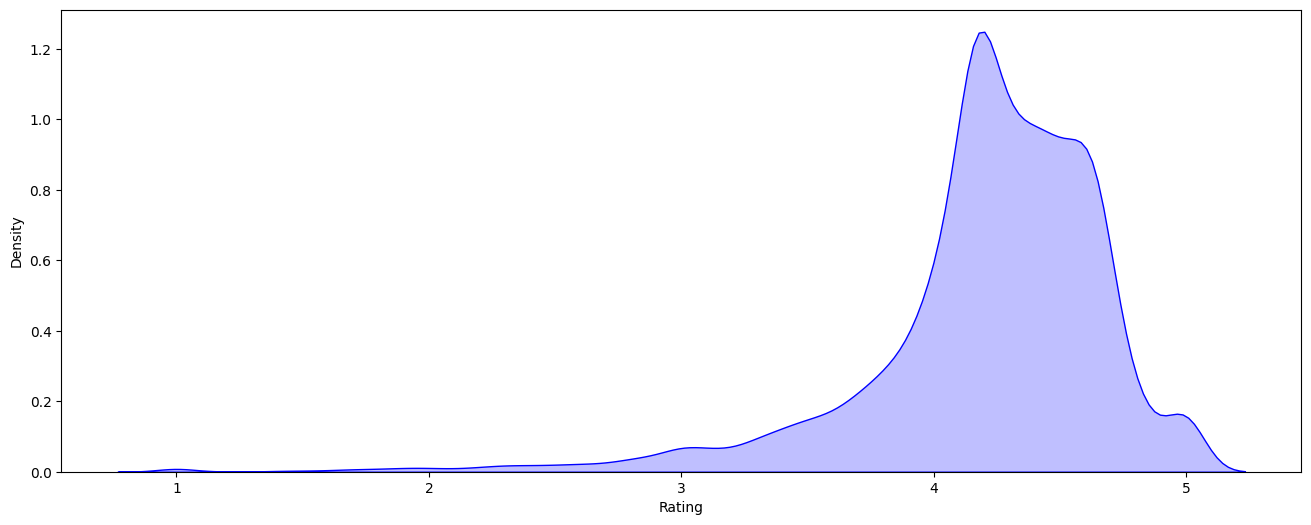

In [86]:
# plot the rating distribution
plt.figure(figsize=(16, 6)) # make figure size
sns.kdeplot(df['Rating'], color="blue", shade=True) # plot the distribution plot

- Top free apps installation?  

<Axes: xlabel='Type', ylabel='Installs'>

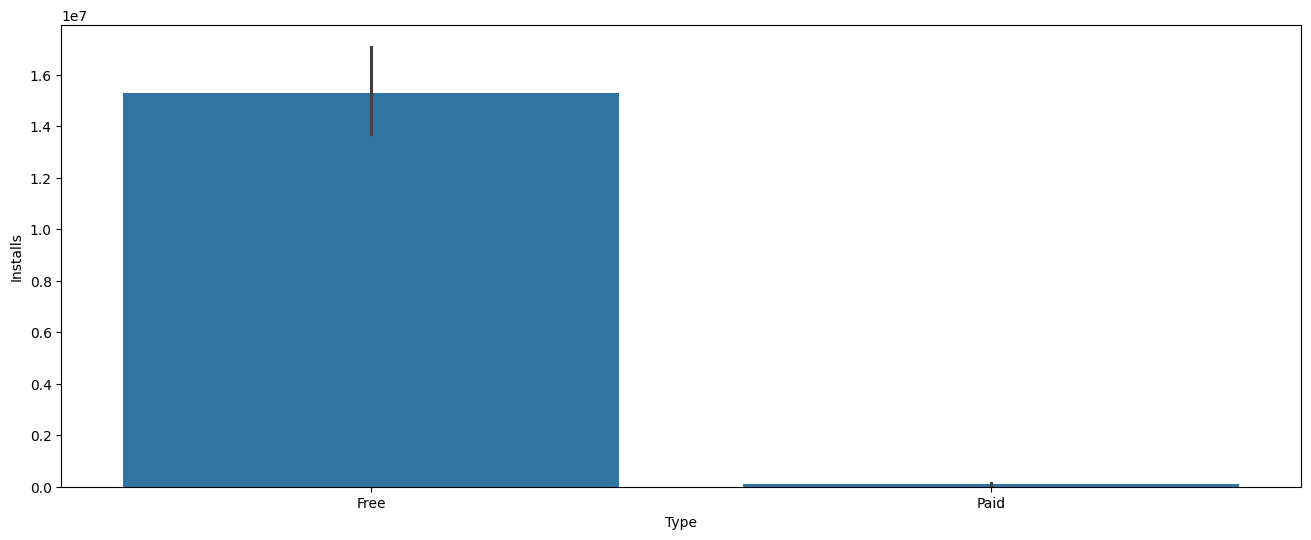

In [87]:
# plot number of installs for free vs paid apps make a bar plot
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Type', y='Installs', data=df) # plot the bar plot


- Top paid vs free apps installation

<Axes: xlabel='Installs', ylabel='Price'>

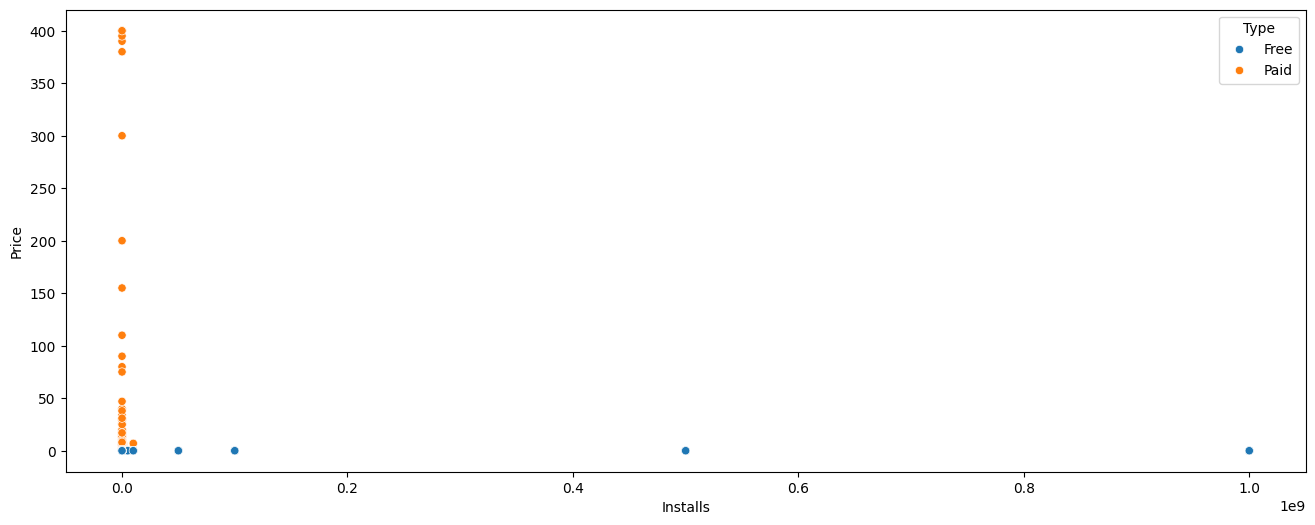

In [88]:
# show scatter plot as well where x-axis is Installs and y-axis is Price and hue is Type
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Installs', y='Price', hue='Type', data=df) # plot the scatter plot

- What's the impact of size on installation?

<Axes: xlabel='Installs_category', ylabel='Size_in_Mb'>

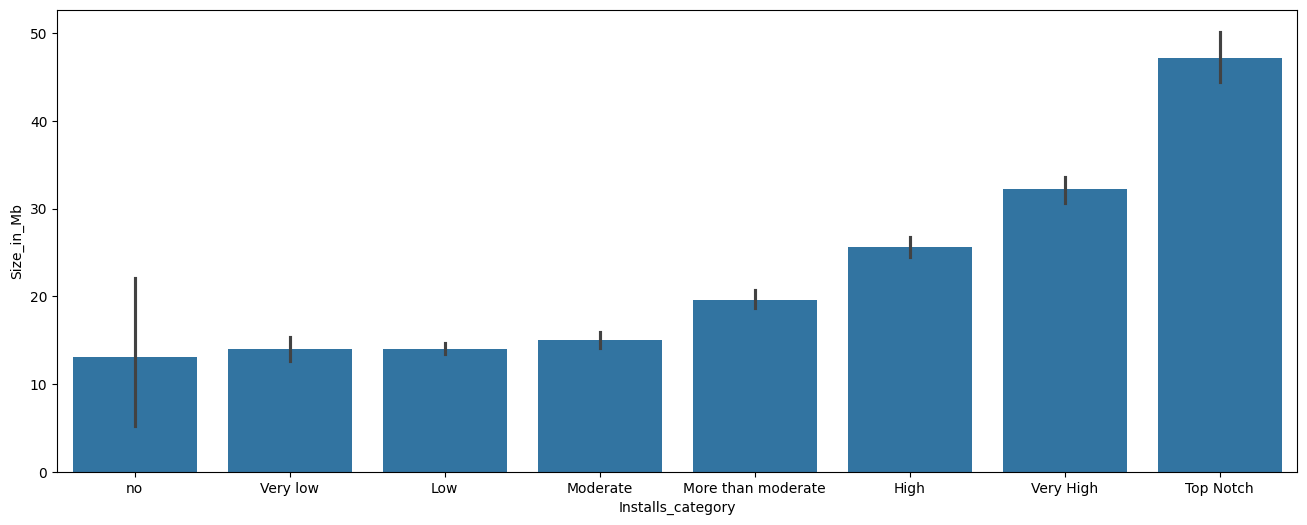

In [89]:
# Check if there is any impact of size on installs
# make a bar plot of Size_in_Mb vs Installs_category
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Installs_category', y='Size_in_Mb', data=df) # plot the bar plot

# Observation
- So here we observe that all the top notch running apps are less than 50mb size.
- if you want to build an app that will be top notch regarding the installation then you have to make it less than 50mb in size

# Which content rating apps are more popular?

In [91]:
# Which content rating is most popular in installs
df['Content Rating'].value_counts() # this will show the value counts of each content rating

Content Rating
Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

- Here we see that the Everyone Content rating apps are more popular and got more installations. 

- Is there ay familiarity between Content Rating vs Installs?

<Axes: xlabel='Content Rating', ylabel='Installs'>

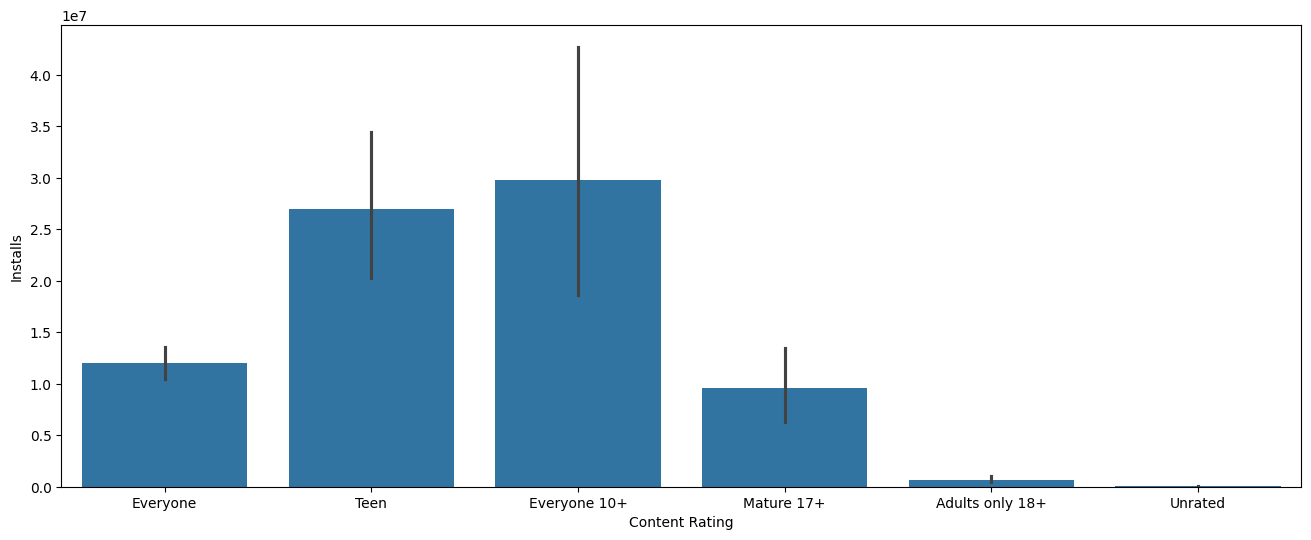

In [92]:
# plot the bar plot of Content Rating vs Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Content Rating', y='Installs', data=df) # plot the bar plot

- Here our observation become true that Everyone Content Rating apps got more installation as we discussed earlier in our observation.

# How many apps are there in Everyone Content Rating?

In [93]:
# find how many apps are there in Everyone content rating
df['Category'].loc[df['Content Rating'] == 'Everyone'].value_counts()

Category
FAMILY                 1498
TOOLS                   833
GAME                    595
BUSINESS                412
PRODUCTIVITY            396
MEDICAL                 390
FINANCE                 355
LIFESTYLE               337
COMMUNICATION           325
PERSONALIZATION         318
SPORTS                  318
PHOTOGRAPHY             307
HEALTH_AND_FITNESS      275
TRAVEL_AND_LOCAL        230
BOOKS_AND_REFERENCE     200
SHOPPING                183
NEWS_AND_MAGAZINES      168
VIDEO_PLAYERS           146
MAPS_AND_NAVIGATION     133
EDUCATION               121
FOOD_AND_DRINK          114
SOCIAL                   98
LIBRARIES_AND_DEMO       84
AUTO_AND_VEHICLES        83
HOUSE_AND_HOME           78
WEATHER                  78
ART_AND_DESIGN           60
PARENTING                58
EVENTS                   53
BEAUTY                   45
ENTERTAINMENT            37
COMICS                   26
DATING                   18
Name: count, dtype: int64

# What are the top 5 paid top-rated apps?

<Axes: xlabel='App', ylabel='Rating'>

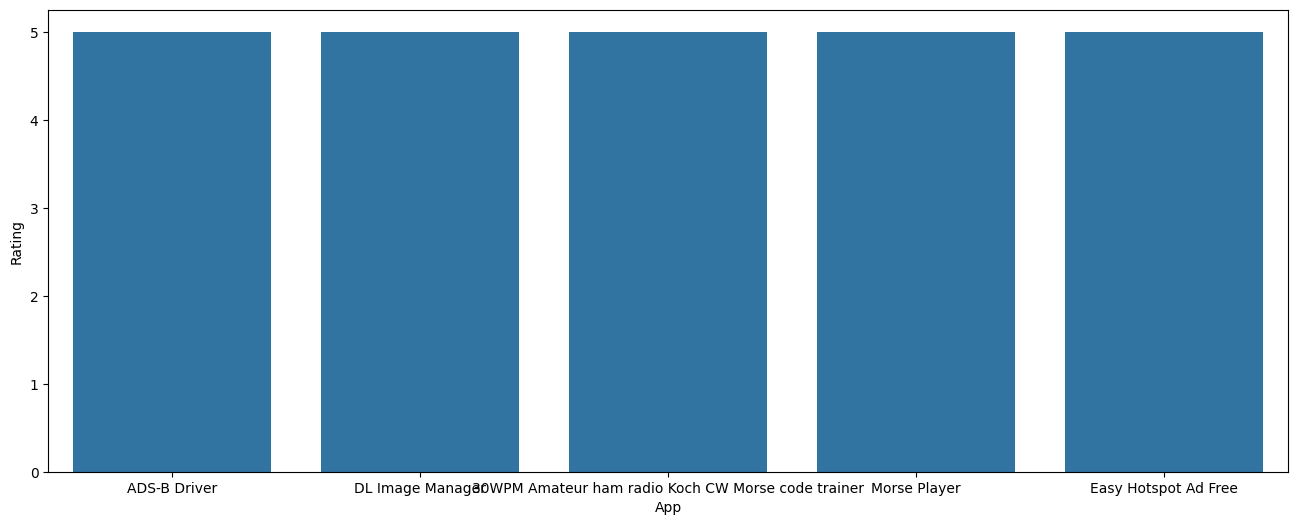

In [94]:
# plot top 5 rated paid apps
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)) # plot the bar plot


In [95]:
df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
3957,ADS-B Driver,TOOLS,5.0,2,6606028.8,100,Paid,1.99,Everyone,Tools,"May 15, 2018",1.19,4.4 and up,6.3,Low
8526,DL Image Manager,PRODUCTIVITY,5.0,2,1782579.2,10,Paid,0.99,Everyone,Productivity,"July 29, 2018",1.0.5,4.0 and up,1.7,Very low
8018,30WPM Amateur ham radio Koch CW Morse code tra...,FAMILY,5.0,1,3879731.2,10,Paid,1.49,Everyone,Education,"May 18, 2018",2.0.2,2.1 and up,3.7,Very low
8014,Morse Player,FAMILY,5.0,12,2516582.4,100,Paid,1.99,Everyone,Education,"January 23, 2017",2.1.1,3.0 and up,2.4,Low
4988,Easy Hotspot Ad Free,TOOLS,5.0,2,3460300.8,10,Paid,0.99,Everyone,Tools,"July 26, 2018",1.05,4.0 and up,3.3,Very low


# What are the top 5 top-rated free apps?

<Axes: xlabel='App', ylabel='Rating'>

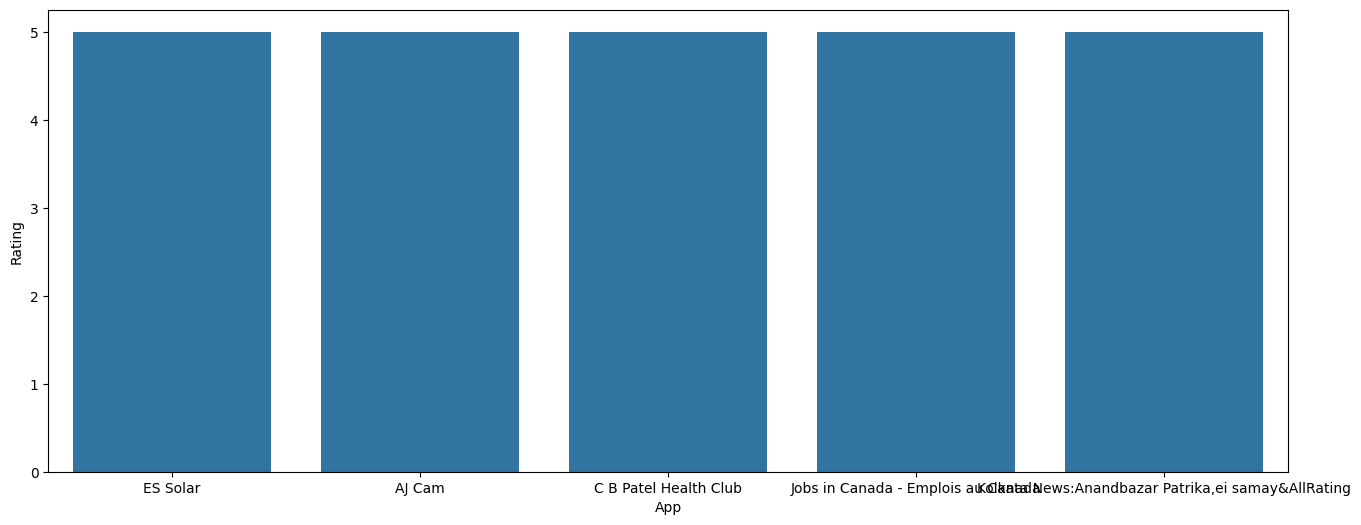

In [96]:
# plot top rated 5 apps in free category
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Free'].sort_values(by='Rating', ascending=False).head(5)) # plot the bar plot


In [97]:
df[df['Type'] == 'Free'].sort_values(by='Rating', ascending=False).head(5)


,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
9815,ES Solar,BUSINESS,5.0,3,4928307.2,100,Free,0.0,Everyone,Business,"May 17, 2018",1.2,4.1 and up,4.7,Low
5230,AJ Cam,PHOTOGRAPHY,5.0,44,2936012.8,100,Free,0.0,Everyone,Photography,"January 23, 2018",1.0,4.1 and up,2.8,Low
7131,C B Patel Health Club,HEALTH_AND_FITNESS,5.0,5,14680064.0,100,Free,0.0,Everyone,Health & Fitness,"July 2, 2018",1.0.1,4.4 and up,14.0,Low
5685,Jobs in Canada - Emplois au Canada,BUSINESS,5.0,2,14680064.0,1000,Free,0.0,Teen,Business,"August 5, 2018",1.1,4.2 and up,14.0,Low
9444,"Kolkata News:Anandbazar Patrika,ei samay&AllRa...",NEWS_AND_MAGAZINES,5.0,10,5242880.0,100,Free,0.0,Everyone,News & Magazines,"July 14, 2018",1.0,4.0.3 and up,5.0,Low


# What are the top 5 free apps with highest number of reviews?

<Axes: xlabel='App', ylabel='Reviews'>

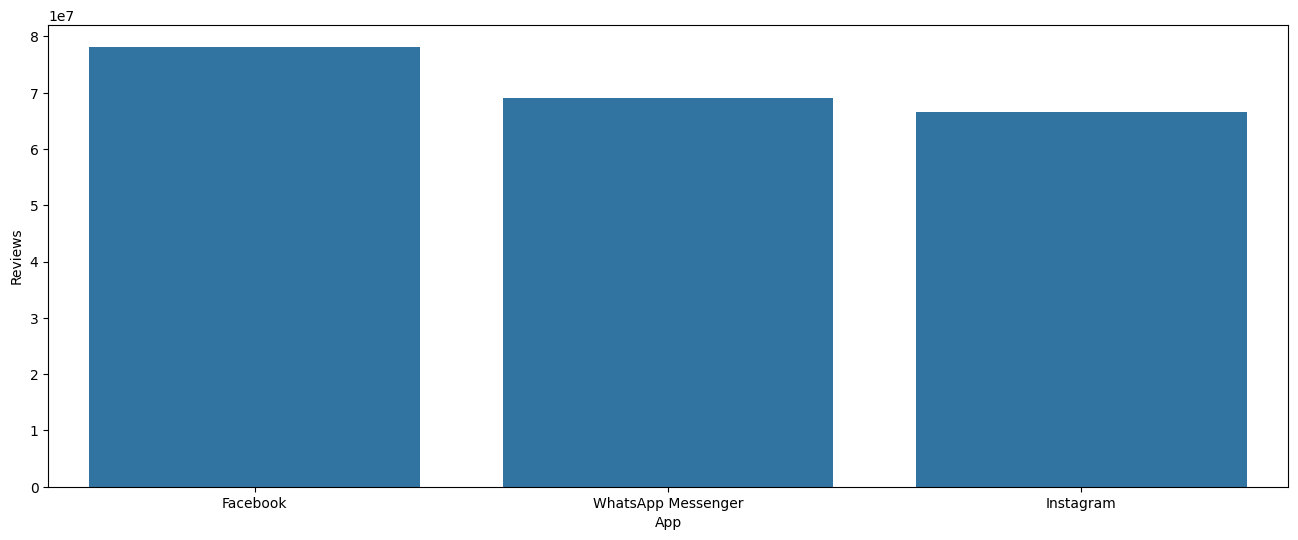

In [98]:
# Plot top 5 FREE apps with highest number of reviews
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5)) # plot the bar plot


In [99]:
df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5)


,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
3943,Facebook,SOCIAL,4.1,78128208,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
2604,Instagram,SOCIAL,4.5,66577446,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,NaN,Top Notch


# What are the top 5 paid apps with highest number of reviews?

<Axes: xlabel='App', ylabel='Reviews'>

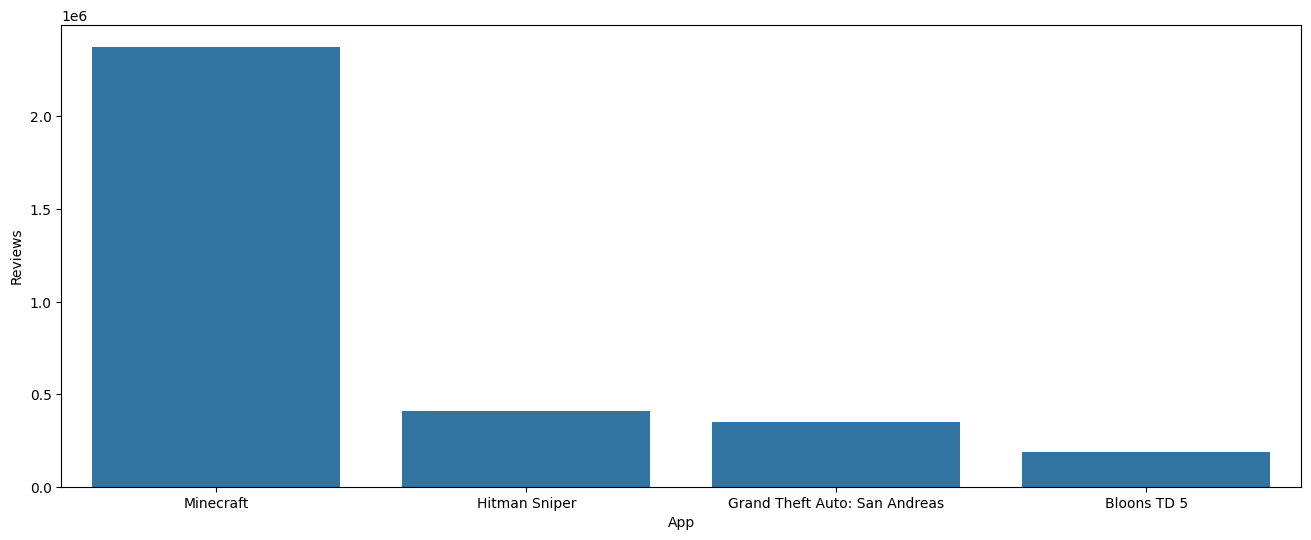

In [100]:
# Plot top 5 Paid apps with highest number of reviews
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Paid'].sort_values(by='Reviews', ascending=False).head(5)) # plot the bar plot


# Here we made it done! on this data set each and everything that we supposed to do or present.